training now
Accuracy: 96.66%
Precision: 98.34%
Recall: 94.87%
F1 Score: 96.58%
Confusion Matrix:
 [[14856   238]
 [  765 14141]]
ROC-AUC Score: 97.84%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     15094
           1       0.98      0.95      0.97     14906

    accuracy                           0.97     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000



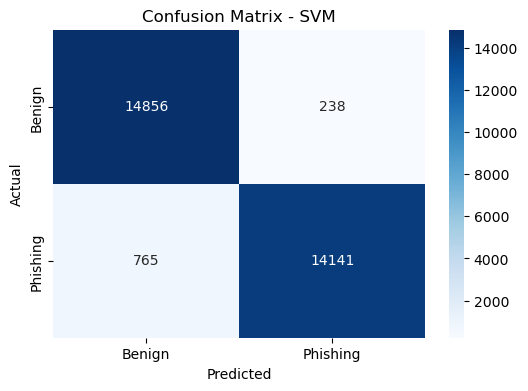

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

# Load dataset
dataset = pd.read_csv('phishing_features.csv')

# Extract features and labels
features = dataset.iloc[:, :-1].to_numpy()
labels = dataset.iloc[:, -1].to_numpy()

# Normalize features
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train SVM model
model = SVC(kernel='rbf', probability=True)
print("training now")
model.fit(X_train, y_train)

# Predictions and metrics
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
roc_auc = roc_auc_score(y_test, y_proba) * 100

# Display results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Phishing'], yticklabels=['Benign', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()



